LINEAR REGRESSION ON HOUSING DATASET WITH PCA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dtr=pd.read_csv("/content/housing_train.csv")
dtr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
dtr.info( verbose = False)
#dtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [ ]:
#drop columns with more than 75% null values
perc = 75.0
min_count =  int(((100-perc)/100)*dtr.shape[0] + 1)
dtr = dtr.dropna( axis=1, thresh=min_count)

dtr.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 77 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(39)
memory usage: 878.4+ KB


In [ ]:
#modify interval data (year to age)
dtr['YearRemodAdd']=2023-dtr['YearRemodAdd']
dtr['Age']=2023-dtr['YearBuilt']
dtr.drop('YearBuilt',axis=1,inplace=True)
dtr['YrSold']=2023-dtr['YrSold']

In [ ]:
#differ object data and float data with null values
dt1=[]
dt2=[]
for i in dtr.columns:
  if(dtr[i].isna().sum())>0:
    print(i," : ",dtr[i].isna().sum())
    if dtr[i].dtype =='O':
      dt1.append(i)
    else:
      dt2.append(i)

LotFrontage  :  259
MasVnrType  :  8
MasVnrArea  :  8
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinType2  :  38
Electrical  :  1
FireplaceQu  :  690
GarageType  :  81
GarageYrBlt  :  81
GarageFinish  :  81
GarageQual  :  81
GarageCond  :  81


In [ ]:
dt1 #object null values

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
dt2 #float null values

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

69.0

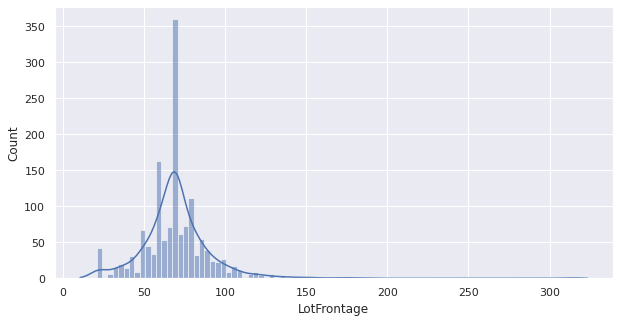

In [ ]:
#fill null values of float levels with its mean
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(dtr['LotFrontage'], alpha=0.5, kde=True, kde_kws={"cut": 2})
dtr['LotFrontage'].fillna(dtr['LotFrontage'].median(),inplace=True)
dtr['LotFrontage'].median()



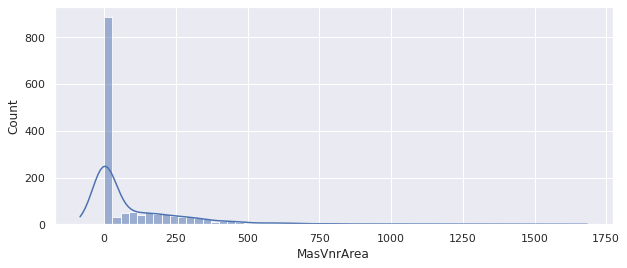

In [ ]:
sns.set(rc={'figure.figsize':(10,4)})
sns.histplot(dtr['MasVnrArea'], alpha=0.5, kde=True, kde_kws={"cut": 2})
dtr['MasVnrArea'].fillna(dtr['MasVnrArea'].median(),inplace=True)

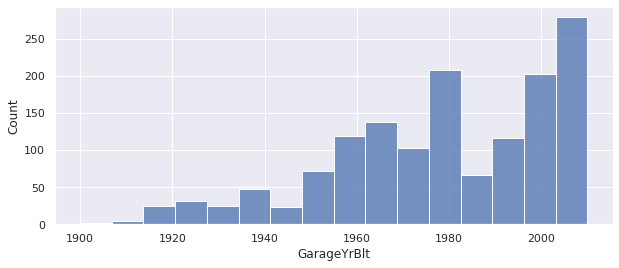

In [ ]:
sns.histplot(dtr['GarageYrBlt'])
dtr['GarageYrBlt'].fillna(dtr['GarageYrBlt'].median(),inplace=True)

In [ ]:
#replacing null values of object level by its mode
for i in dtr.columns:
  if(dtr[i].isna().sum())>0:
    if dtr[i].dtype =='O':
      dtr[i].fillna(dtr[i].mode()[0],inplace=True)
      print(i," : ",dtr[i].isna().sum())



MasVnrType  :  0
BsmtQual  :  0
BsmtCond  :  0
BsmtExposure  :  0
BsmtFinType1  :  0
BsmtFinType2  :  0
Electrical  :  0
FireplaceQu  :  0
GarageType  :  0
GarageFinish  :  0
GarageQual  :  0
GarageCond  :  0


<AxesSubplot:>

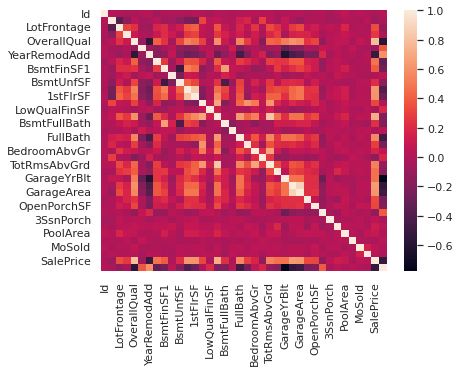

In [ ]:
fig, ax = plt.subplots(figsize=(6.4,4.8))
sns.heatmap(dtr.corr())

In [ ]:
#divide dataset into 4 parts of 19+1 col each

dtr01=dtr.iloc[:,0:19]
dtr01['SalePrice']=dtr['SalePrice']
#dtr01.info()

dtr02=  dtr.iloc[:,19:38]
dtr02['SalePrice']=dtr['SalePrice']
dtr02.info()

dtr03=  dtr.iloc[:,38:57]
dtr03['SalePrice']=dtr['SalePrice']
dtr03.info()

dtr04=  dtr.iloc[:,57:]
dtr04['SalePrice']=dtr['SalePrice']
dtr04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RoofStyle     1460 non-null   object 
 1   RoofMatl      1460 non-null   object 
 2   Exterior1st   1460 non-null   object 
 3   Exterior2nd   1460 non-null   object 
 4   MasVnrType    1460 non-null   object 
 5   MasVnrArea    1460 non-null   float64
 6   ExterQual     1460 non-null   object 
 7   ExterCond     1460 non-null   object 
 8   Foundation    1460 non-null   object 
 9   BsmtQual      1460 non-null   object 
 10  BsmtCond      1460 non-null   object 
 11  BsmtExposure  1460 non-null   object 
 12  BsmtFinType1  1460 non-null   object 
 13  BsmtFinSF1    1460 non-null   int64  
 14  BsmtFinType2  1460 non-null   object 
 15  BsmtFinSF2    1460 non-null   int64  
 16  BsmtUnfSF     1460 non-null   int64  
 17  TotalBsmtSF   1460 non-null   int64  
 18  Heating       1460 non-null 

In [ ]:
#plot r-sqaure matrix of all sub-dataset and 
#drop columns with weak relation with the
#predicting variable - 'Sales Price'

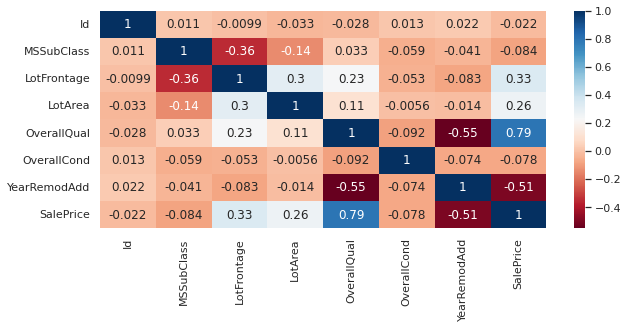

In [ ]:
sns.heatmap(dtr01.corr(),annot=True,cmap="RdBu")
plt.show()

In [ ]:
dtr.drop('Id',axis=1,inplace=True)
dtr.drop('MSSubClass',axis=1,inplace=True)
dtr.drop('OverallCond',axis=1,inplace=True)

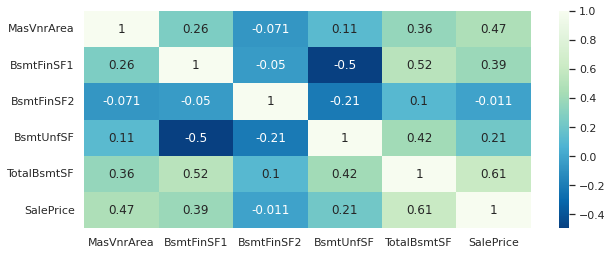

In [ ]:
sns.heatmap(dtr02.corr(),annot=True,cmap="GnBu_r")
plt.show()

In [ ]:
dtr.drop('BsmtFinSF2',axis=1,inplace=True)

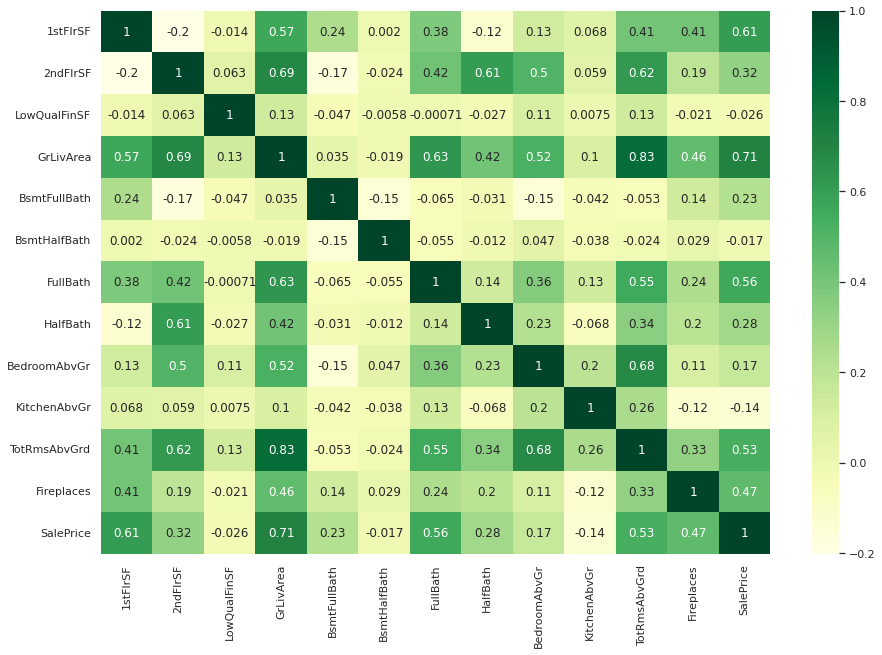

In [ ]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(dtr03.corr(),annot=True,cmap="YlGn")
plt.show()

In [ ]:
dtr.drop('LowQualFinSF',axis=1,inplace=True)
dtr.drop('BsmtHalfBath',axis=1,inplace=True)


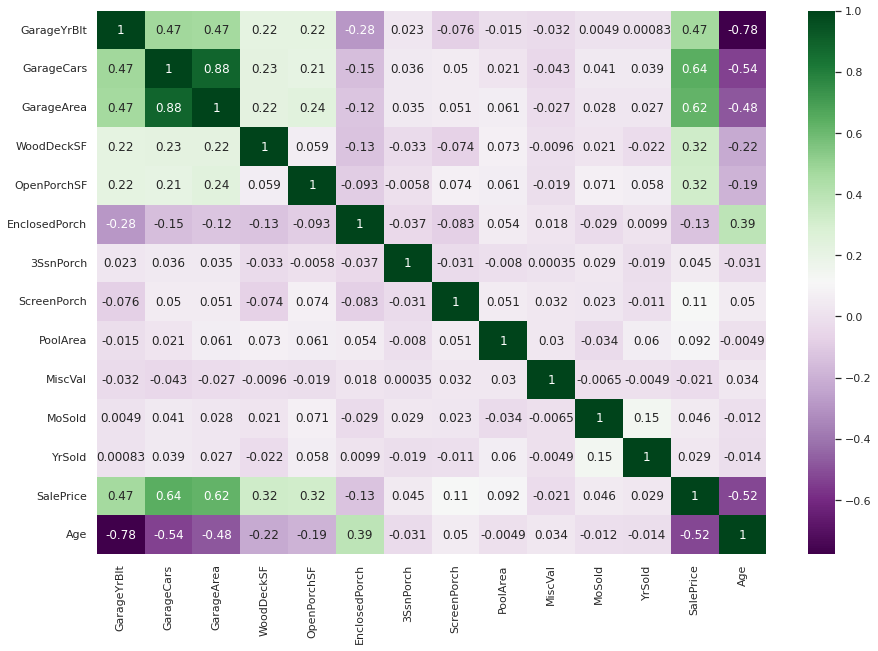

In [ ]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(dtr04.corr(),annot=True,cmap="PRGn")
plt.show()

In [ ]:
dtr.drop('3SsnPorch',axis=1,inplace=True)
dtr.drop('ScreenPorch',axis=1,inplace=True)
dtr.drop('PoolArea',axis=1,inplace=True)
dtr.drop('MiscVal',axis=1,inplace=True)
dtr.drop('MoSold',axis=1,inplace=True)
dtr.drop('YrSold',axis=1,inplace=True)

In [ ]:
dtr.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 65 entries, MSZoning to Age
dtypes: float64(3), int64(23), object(39)
memory usage: 741.5+ KB


In [ ]:
# Find sum of unique Values in obj dt
#drop cols with higher count

for i in dtr.columns:
    if dtr[i].dtype =='O':
      print(i," : ", dtr[i].nunique())


MSZoning  :  5
Street  :  2
LotShape  :  4
LandContour  :  4
Utilities  :  2
LotConfig  :  5
LandSlope  :  3
Neighborhood  :  25
Condition1  :  9
Condition2  :  8
BldgType  :  5
HouseStyle  :  8
RoofStyle  :  6
RoofMatl  :  8
Exterior1st  :  15
Exterior2nd  :  16
MasVnrType  :  4
ExterQual  :  4
ExterCond  :  5
Foundation  :  6
BsmtQual  :  4
BsmtCond  :  4
BsmtExposure  :  4
BsmtFinType1  :  6
BsmtFinType2  :  6
Heating  :  6
HeatingQC  :  5
CentralAir  :  2
Electrical  :  5
KitchenQual  :  4
Functional  :  7
FireplaceQu  :  5
GarageType  :  6
GarageFinish  :  3
GarageQual  :  5
GarageCond  :  5
PavedDrive  :  3
SaleType  :  9
SaleCondition  :  6


In [ ]:
dtr.drop('Neighborhood', axis=1,inplace=True)

In [ ]:
# apply one hot encoding
cols=dtr.select_dtypes(include='object').columns.tolist()
dtr =pd.get_dummies(dtr, columns=cols)  
dtr.head()

,LotFrontage,LotArea,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,20,196.0,706,150,856,856,854,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,47,0.0,978,284,1262,1262,0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,21,162.0,486,434,920,920,866,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,53,0.0,216,540,756,961,756,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,23,350.0,655,490,1145,1145,1053,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
det_var= dtr.corr()["SalePrice"].sort_values()
det_var

ExterQual_TA       -0.589044
Age                -0.522897
KitchenQual_TA     -0.519298
GarageFinish_Unf   -0.513906
YearRemodAdd       -0.507101
                      ...   
GarageArea          0.623431
GarageCars          0.640409
GrLivArea           0.708624
OverallQual         0.790982
SalePrice           1.000000
Name: SalePrice, Length: 240, dtype: float64

In [ ]:
#applying linear regression 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = dtr.drop("SalePrice",axis=1)
y = dtr["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.3, random_state=1)
X_train

clf = LinearRegression()
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 120)
x_train = pca.fit_transform(X_train)
x_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

clf=clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
r2_score = clf.score(X_train,y_train)
print("The Accuracy for Test Set is {}".format(r2_score*100))
print("MSE: ",mean_squared_error(y_test,y_pred))


The Accuracy for Test Set is 91.44534368890199
MSE:  5.531287530143838e+32
